In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt



In [2]:
df_btc = pd.read_csv('../data/btc.csv')
df_dxy = pd.read_csv('../data/dxy.csv')
df_dsg = pd.read_csv('../data/dsg.csv')

In [3]:
df_btc.head()

,date,bitcoin_price
0,NaN,BTC-USD
1,2015-01-01,314.2489929199219
2,2015-01-02,315.0320129394531
3,2015-01-03,281.0820007324219
4,2015-01-04,264.19500732421875


In [4]:
df_dsg.head()

,date,DGS2
0,2015-01-01,NaN
1,2015-01-02,0.66
2,2015-01-05,0.68
3,2015-01-06,0.65
4,2015-01-07,0.62


In [5]:
df_dxy.head()

,date,dxy
0,NaN,DX-Y.NYB
1,2015-01-02,91.08000183105469
2,2015-01-05,91.37999725341797
3,2015-01-06,91.5
4,2015-01-07,91.88999938964844


In [6]:
df_btc = df_btc.drop(0).reset_index(drop=True)
df_dsg = df_dsg.drop(0).reset_index(drop=True)
df_dxy = df_dxy.drop(0).reset_index(drop=True)

In [7]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           3722 non-null   object
 1   bitcoin_price  3722 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [8]:
df_dsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2656 non-null   object 
 1   DGS2    2546 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.6+ KB


In [9]:
df_dsg[df_dsg.isna() == True]

,date,DGS2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
2651,NaN,NaN
2652,NaN,NaN
2653,NaN,NaN
2654,NaN,NaN


In [10]:
df_dxy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2561 non-null   object
 1   dxy     2561 non-null   object
dtypes: object(2)
memory usage: 40.1+ KB


In [11]:
df_btc['date'] = pd.to_datetime(df_btc['date'], format= '%Y-%m-%d')
df_btc.set_index('date', inplace=True)

df_dsg['date'] = pd.to_datetime(df_dsg['date'], format= '%Y-%m-%d')
df_dsg.set_index('date', inplace=True)

df_dxy['date'] = pd.to_datetime(df_dxy['date'], format= '%Y-%m-%d')
df_dxy.set_index('date', inplace=True)

In [12]:
# Merge df_dxy into df_btc using a left join
merged_df = df_btc.merge(df_dxy, on='date', how='left')

# Merge df_dsg into the merged dataframe using a left join
merged_df = merged_df.merge(df_dsg, on='date', how='left')

print(merged_df.head())

                 bitcoin_price                dxy  DGS2
date                                                   
2015-01-01   314.2489929199219                NaN   NaN
2015-01-02   315.0320129394531  91.08000183105469  0.66
2015-01-03   281.0820007324219                NaN   NaN
2015-01-04  264.19500732421875                NaN   NaN
2015-01-05   274.4739990234375  91.37999725341797  0.68


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3722 entries, 2015-01-01 to 2025-03-10
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bitcoin_price  3722 non-null   object 
 1   dxy            2561 non-null   object 
 2   DGS2           2546 non-null   float64
dtypes: float64(1), object(2)
memory usage: 116.3+ KB


In [14]:
merged_df[(merged_df['DGS2'].isna()) & (merged_df['dxy'].notna())].head(50)


,bitcoin_price,dxy,DGS2
date,,,
2015-10-12,245.30799865722656,94.83999633789062,NaN
2015-11-11,311.0840148925781,99.01000213623047,NaN
2016-01-18,387.1679992675781,99.12000274658203,NaN
2017-10-09,4772.02001953125,93.73999786376953,NaN
2018-10-08,6652.22998046875,95.7699966430664,NaN
2018-11-12,6371.27001953125,97.54000091552734,NaN
2019-10-14,8374.6865234375,98.44999694824219,NaN
2019-11-11,8757.7880859375,98.19999694824219,NaN
2020-10-12,11555.36328125,93.06999969482422,NaN


In [15]:
merged_df['bitcoin_price'] = merged_df['bitcoin_price'].astype(float).round(2)
merged_df['dxy'] = merged_df['dxy'].astype(float).round(2)
merged_df['DGS2'] = merged_df['DGS2'].round(2)

print(merged_df.head())

            bitcoin_price    dxy  DGS2
date                                  
2015-01-01         314.25    NaN   NaN
2015-01-02         315.03  91.08  0.66
2015-01-03         281.08    NaN   NaN
2015-01-04         264.20    NaN   NaN
2015-01-05         274.47  91.38  0.68


Estrategia de llenado de nulos:

* Dado que durante los feriados y fines de semana el DXY y DGS2 no operan, se propone rellenar los valores faltantes con el valor
previo disponible.

Esto se lograra utilizando el metodo forward fill de pandas:


In [16]:
# Forward-fill NaNs in all columns
merged_df = merged_df.ffill()

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3722 entries, 2015-01-01 to 2025-03-10
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bitcoin_price  3722 non-null   float64
 1   dxy            3721 non-null   float64
 2   DGS2           3721 non-null   float64
dtypes: float64(3)
memory usage: 116.3 KB


In [18]:
merged_df.head()

,bitcoin_price,dxy,DGS2
date,,,
2015-01-01,314.25,NaN,NaN
2015-01-02,315.03,91.08,0.66
2015-01-03,281.08,91.08,0.66
2015-01-04,264.20,91.08,0.66
2015-01-05,274.47,91.38,0.68


In [19]:
merged_df = merged_df.drop(merged_df.index[0])
merged_df.head()

,bitcoin_price,dxy,DGS2
date,,,
2015-01-02,315.03,91.08,0.66
2015-01-03,281.08,91.08,0.66
2015-01-04,264.20,91.08,0.66
2015-01-05,274.47,91.38,0.68
2015-01-06,286.19,91.50,0.65


---

# Vista grafica

<Axes: title={'center': 'Bitcoin Price Over Time'}, xlabel='date'>

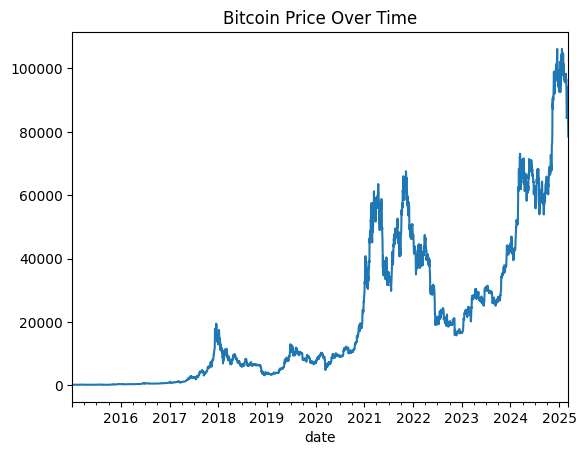

In [20]:
merged_df['bitcoin_price'].plot(title='Bitcoin Price Over Time')

<Axes: title={'center': 'DXY Over Time'}, xlabel='date'>

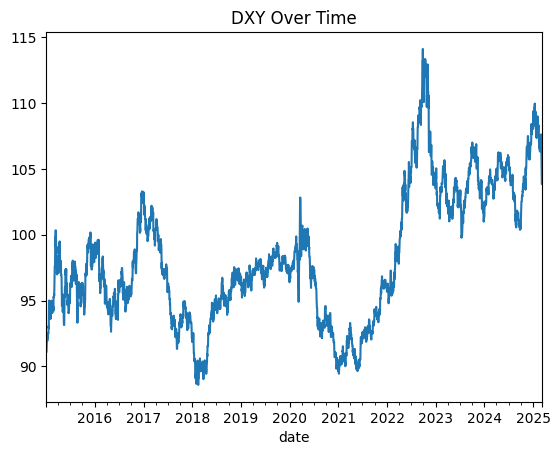

In [21]:
merged_df['dxy'].plot(title='DXY Over Time')

<Axes: title={'center': 'DGS2 Over Time'}, xlabel='date'>

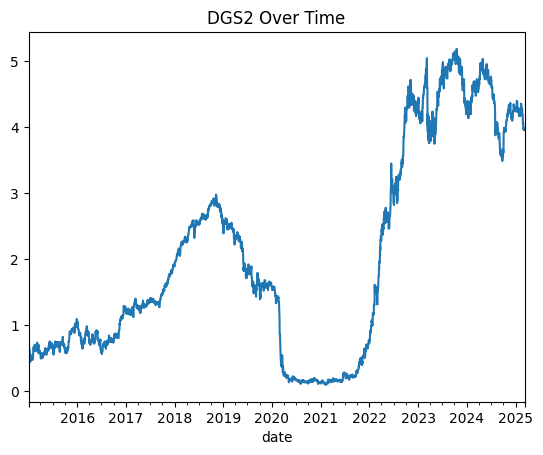

In [22]:
merged_df['DGS2'].plot(title='DGS2 Over Time')

---

# Transformaciones

Se aplicara:

* Transformacion logaritmica
* Diferenciacion de primer grado

Esto permite obtener series que reflejen la variacion porcentual en los precios diarios.

In [37]:
# Transformacion logaritmica:
transformed_df = np.log(merged_df.replace(0, np.nan)).dropna()
transformed_df.columns = [f"{col}_log" for col in transformed_df.columns]
transformed_df.head()

,bitcoin_price_log,dxy_log,DGS2_log,bitcoin_price_log_log
date,,,,
2015-01-02,5.752668,4.511738,-0.415515,1.749664
2015-01-03,5.638639,4.511738,-0.415515,1.729643
2015-01-04,5.576706,4.511738,-0.415515,1.718598
2015-01-05,5.614842,4.515027,-0.385662,1.725413
2015-01-06,5.656656,4.516339,-0.430783,1.732833


In [38]:
# Diferenciacion de primer orden:
for col in transformed_df.columns:
    transformed_df[f"{col}_diff"] = transformed_df[col].diff()

transformed_df.dropna(inplace=True)
transformed_df.head()

,bitcoin_price_log,dxy_log,DGS2_log,bitcoin_price_log_log,bitcoin_price_log_diff,dxy_log_diff,DGS2_log_diff,bitcoin_price_log_log_diff
date,,,,,,,,
2015-01-03,5.638639,4.511738,-0.415515,1.729643,-0.114029,0.000000,0.000000,-0.020021
2015-01-04,5.576706,4.511738,-0.415515,1.718598,-0.061933,0.000000,0.000000,-0.011044
2015-01-05,5.614842,4.515027,-0.385662,1.725413,0.038136,0.003288,0.029853,0.006815
2015-01-06,5.656656,4.516339,-0.430783,1.732833,0.041814,0.001312,-0.045120,0.007419
2015-01-07,5.684736,4.520592,-0.478036,1.737785,0.028080,0.004253,-0.047253,0.004952


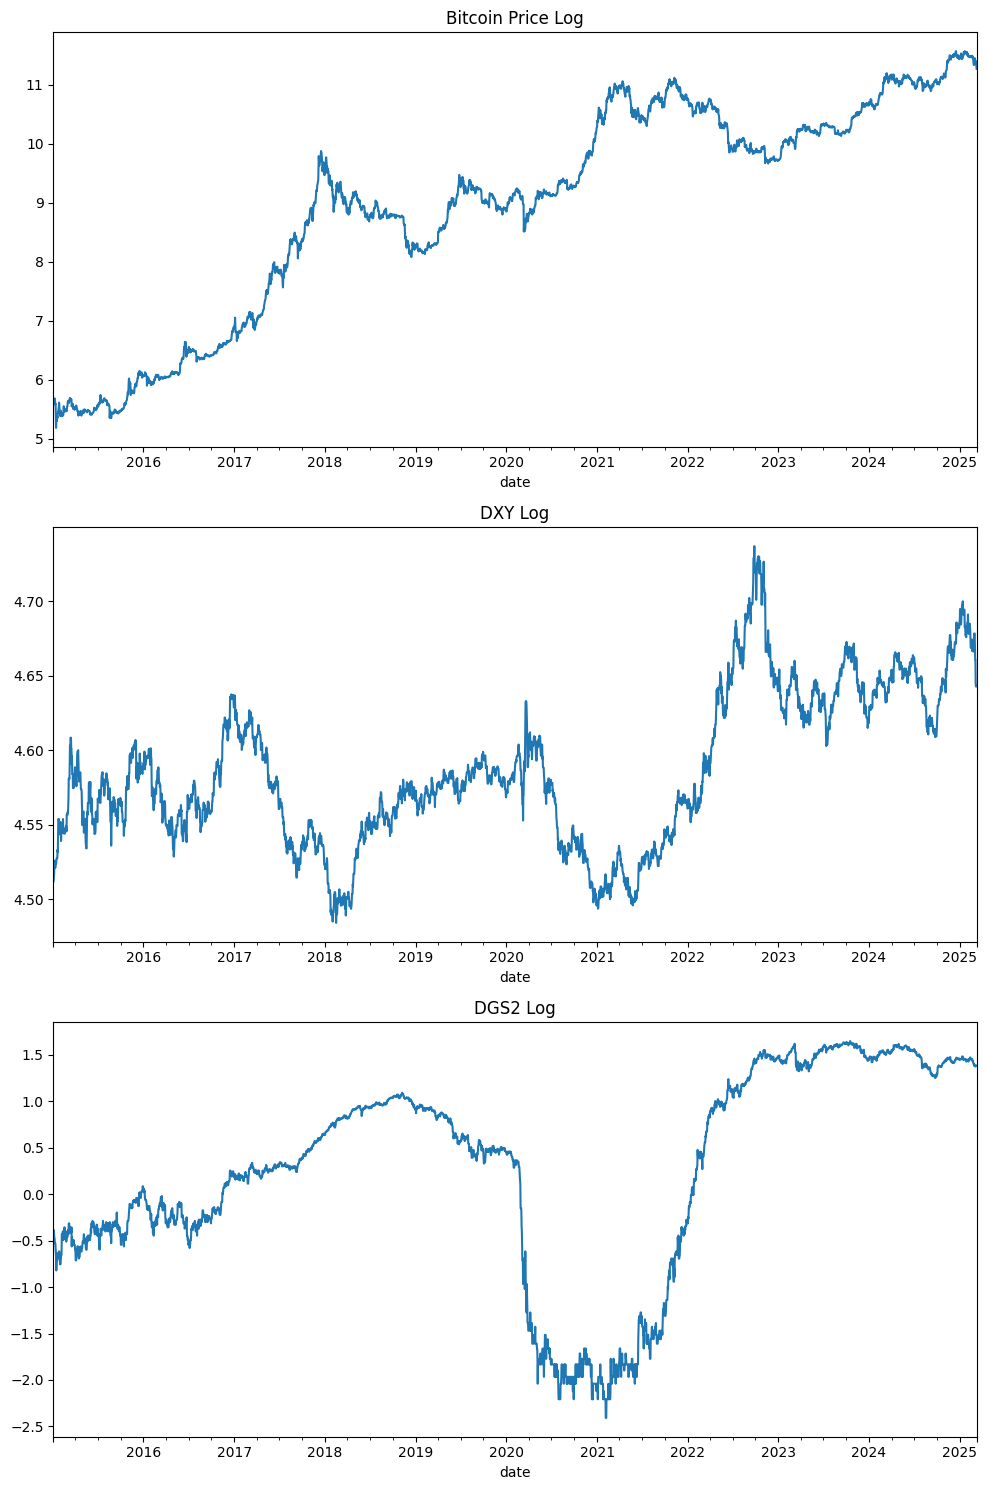

In [40]:
fig, axes = plt.pyplot.subplots(nrows=3, ncols=1, figsize=(10, 15))

transformed_df['bitcoin_price_log'].plot(ax=axes[0], title='Bitcoin Price Log')
transformed_df['dxy_log'].plot(ax=axes[1], title='DXY Log')
transformed_df['DGS2_log'].plot(ax=axes[2], title='DGS2 Log')

plt.pyplot.tight_layout()
plt.pyplot.show()

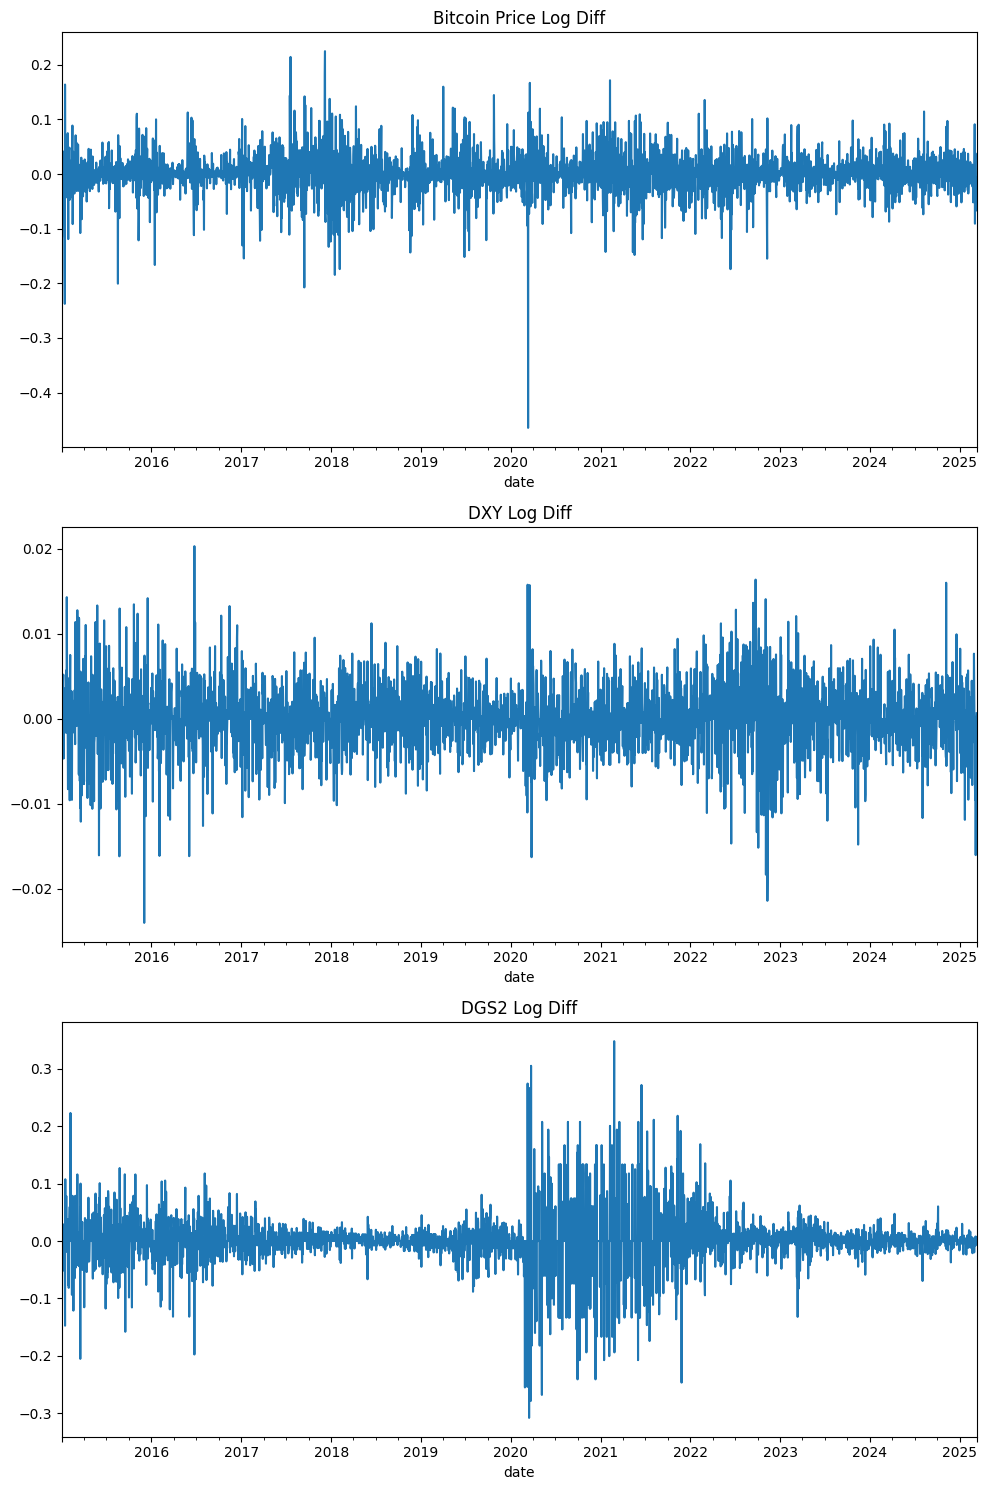

In [41]:
fig, axes = plt.pyplot.subplots(nrows=3, ncols=1, figsize=(10, 15))

transformed_df['bitcoin_price_log_diff'].plot(ax=axes[0], title='Bitcoin Price Log Diff')
transformed_df['dxy_log_diff'].plot(ax=axes[1], title='DXY Log Diff')
transformed_df['DGS2_log_diff'].plot(ax=axes[2], title='DGS2 Log Diff')

plt.pyplot.tight_layout()
plt.pyplot.show()